# 입문자를 위한, 파이썬/R 데이터 분석    

]

## (DB분석) SQLite 활용 여성패션 쇼핑몰 데이터분석

1) 내부 데이터를 다른 데이터 분석가가 이용할 수 있도록 정리하고, 

2) 정리한 데이터를 바탕으로 요청사항을 분석 정리합니다

**< Set options >**

In [1]:
import pandas as pd

In [2]:
# 화면에 출력하는 데이터 프레임의 최대 row 수를 500으로 설정
pd.set_option('display.max_rows', 500)

# 화면에 출력하는 데이터 프레임의 최대 column 수를 500으로 설정
pd.set_option('display.max_columns', 500)

**1. data 폴더의 C_team_DB.db에 연결한 뒤 데이터베이스 스키마를 출력해주세요. 그 다음,  order 테이블을 불러와주세요.**

C 팀 데이터 테이블들을 모두 C_team_DB.db 파일에 저장해두었습니다. 저번 주 수업자료를 참고해 database를 조회하고 그 중, order 테이블을 불러와주세요. 테이블이 다음과 같은 모양입니다.

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>timestamp</th>
      <th>user_id</th>
      <th>goods_id</th>
      <th>shop_id</th>
      <th>price</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>2018-06-11 00:00:43.032</td>
      <td>bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx</td>
      <td>1414</td>
      <td>38</td>
      <td>45000</td>
    </tr>
    <tr>
      <th>1</th>
      <td>2018-06-11 00:02:33.763</td>
      <td>smDmRnykg61KajpxXKzQ0oNkrh2nuSBj</td>
      <td>1351</td>
      <td>12</td>
      <td>9500</td>
    </tr>
    <tr>
      <th>2</th>
      <td>2018-06-11 00:04:06.364</td>
      <td>EyGjKYtSqZgqJ1ddKCtH5XwGirTyOH2P</td>
      <td>646</td>
      <td>14</td>
      <td>22000</td>
    </tr>
    <tr>
      <th>3</th>
      <td>2018-06-11 00:04:17.258</td>
      <td>KQBGi33Zxh5Dgu0WEkOkjN0YqTT_wxC3</td>
      <td>5901</td>
      <td>46</td>
      <td>29800</td>
    </tr>
    <tr>
      <th>4</th>
      <td>2018-06-11 00:05:26.010</td>
      <td>lq1Je3voA3a0MouSFba3629lKCvweI24</td>
      <td>5572</td>
      <td>89</td>
      <td>29000</td>
    </tr>
  </tbody>
</table>

In [3]:
# python에서 DB를 다루는 library인 sqlite3와 데이터를 다루는 library인 padas를 import합니다.
import sqlite3

In [4]:
#Write your code here!
# DB 파일과 연결
conn = sqlite3.connect('data/C_team_DB.db')
#conn = sqlite3.connect('C_team_DB.db')
conn

In [5]:
# Sqlite3 과 연결된 DB 테이블 구조 확인 : 
query = "select * from 'sqlite_master'"       # 해당 DB에서 전체 Master 되는 Table 들 조회시 사용
pd.read_sql(query, conn)

,type,name,tbl_name,rootpage,sql
0,table,order,order,3142,"CREATE TABLE ""order"" (\n""timestamp"" TEXT,\n ""..."
1,table,good,good,2,"CREATE TABLE ""good"" (\n""goods_id"" INTEGER,\n ..."
2,table,shop,shop,10,"CREATE TABLE ""shop"" (\n""shop_id"" INTEGER,\n ""..."
3,table,log,log,121,"CREATE TABLE ""log"" (\n""timestamp"" TEXT,\n ""us..."
4,table,user,user,18,"CREATE TABLE ""user"" (\n""user_id"" TEXT,\n ""os""..."


In [6]:
# order table 만 불러오기 :
query = "select * from 'order'"
order = pd.read_sql(query, conn)
order.head()

,timestamp,user_id,goods_id,shop_id,price
0,2018-06-11 00:00:43.032,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,1414,38,45000
1,2018-06-11 00:02:33.763,smDmRnykg61KajpxXKzQ0oNkrh2nuSBj,1351,12,9500
2,2018-06-11 00:04:06.364,EyGjKYtSqZgqJ1ddKCtH5XwGirTyOH2P,646,14,22000
3,2018-06-11 00:04:17.258,KQBGi33Zxh5Dgu0WEkOkjN0YqTT_wxC3,5901,46,29800
4,2018-06-11 00:05:26.010,lq1Je3voA3a0MouSFba3629lKCvweI24,5572,89,29000


In [7]:
order.tail()

,timestamp,user_id,goods_id,shop_id,price
862,2018-06-11 23:47:02.003,i_Ar2GyU8xAEeQwzJm6wr60VDB6ofOpK,1065,61,29000
863,2018-06-11 23:50:42.202,49JWS9E7KuSnvv1B7uqMnsiT82ZmtRlO,502,12,12900
864,2018-06-11 23:51:54.449,wuK4KeAhonDy4KHxO8D60fFQsxoo_34c,5318,181,13200
865,2018-06-11 23:54:11.765,GU1JdCza2vj7N-0_YN3JOftW7SRXkWDi,2989,19,18900
866,2018-06-11 23:57:47.896,6xq2ibp39i7HaiTt_dOwWfpMC5UlFLhJ,1659,22,19000


In [8]:
order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 867 entries, 0 to 866
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   timestamp  867 non-null    object
 1   user_id    867 non-null    object
 2   goods_id   867 non-null    int64 
 3   shop_id    867 non-null    int64 
 4   price      867 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 34.0+ KB


order 테이블의 각 행은 주문이 일어난 로그를 나타냅니다. 현재는 2018년 6월 11일 하루치 데이터가 들어있습니다.

timestamp는 주문시각, user_id는 주문을 한 유저의 고유 아이디, goods_id는 상품의 id, shop_id는 쇼핑몰의 id, price는 상품의 가격을 나타냅니다.

**2. order 테이블을 이용해 C팀의 당일 매출 상위 10개 쇼핑몰을 구해주세요.**

order 테이블을 이용해 C팀을 통해 이루어진 6월 11일의 쇼핑몰별 매출 정보를 피벗 테이블을 이용하여 구해주세요. 결과는 다음과 같이 나와야 합니다.

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>price</th>
    </tr>
    <tr>
      <th>shop_id</th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>22</th>
      <td>1365200</td>
    </tr>
    <tr>
      <th>14</th>
      <td>872000</td>
    </tr>
    <tr>
      <th>63</th>
      <td>710700</td>
    </tr>
    <tr>
      <th>32</th>
      <td>707900</td>
    </tr>
    <tr>
      <th>126</th>
      <td>669400</td>
    </tr>
    <tr>
      <th>6</th>
      <td>655900</td>
    </tr>
    <tr>
      <th>11</th>
      <td>653000</td>
    </tr>
    <tr>
      <th>60</th>
      <td>558300</td>
    </tr>
    <tr>
      <th>19</th>
      <td>518400</td>
    </tr>
    <tr>
      <th>12</th>
      <td>446900</td>
    </tr>
  </tbody>
</table>

In [9]:
#Write your code here!
order_top10 = pd.pivot_table(data=order, index='shop_id', values='price', aggfunc='sum').  \
              sort_values(by='price', ascending=False).head(10)
order_top10

,price
shop_id,
22,1365200
14,872000
63,710700
32,707900
126,669400
6,655900
11,653000
60,558300
19,518400


**3. 판매 건수를 포함하여 피벗테이블을 만들어주세요. 또한, 상위 10개 쇼핑몰의 매출을 막대그래프로 보여주세요.**

같은 횟수의 거래라도 제품의 가격이 비싸면 매출이 크게 나오게 되어있습니다. 상대적으로 저렴한 물품을 파는 쇼핑몰들은 결제 건수에 비해 매출이 적을 수 있습니다.

매출과 결제 건수를 함께 볼 수 있는 피벗테이블을 작성해주세요. 그리고, 그 결과를 막대그래프로 시각화하여 보여주세요. 결과는 다음과 같이 나오게됩니다.

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>sum</th>
      <th>count</th>
    </tr>
    <tr>
      <th>shop_id</th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>22</th>
      <td>1365200</td>
      <td>99</td>
    </tr>
    <tr>
      <th>14</th>
      <td>872000</td>
      <td>30</td>
    </tr>
    <tr>
      <th>63</th>
      <td>710700</td>
      <td>27</td>
    </tr>
    <tr>
      <th>32</th>
      <td>707900</td>
      <td>37</td>
    </tr>
    <tr>
      <th>126</th>
      <td>669400</td>
      <td>39</td>
    </tr>
    <tr>
      <th>6</th>
      <td>655900</td>
      <td>24</td>
    </tr>
    <tr>
      <th>11</th>
      <td>653000</td>
      <td>19</td>
    </tr>
    <tr>
      <th>60</th>
      <td>558300</td>
      <td>23</td>
    </tr>
    <tr>
      <th>19</th>
      <td>518400</td>
      <td>19</td>
    </tr>
    <tr>
      <th>12</th>
      <td>446900</td>
      <td>42</td>
    </tr>
  </tbody>
</table>

![](https://i.imgur.com/T6VRYf6.png)

In [10]:
## 시각화 표현을 위한 Import :
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [11]:
#Write your code here!
order_top10 = pd.pivot_table(data=order, index='shop_id', values='price', aggfunc=['sum','count'])
order_top10#.columns

,sum,count
,price,price
shop_id,,
1,84600,3
2,347100,16
3,143100,5
4,49000,1
5,9900,1
6,655900,24
7,32000,1
8,12900,1


In [12]:
order_top10.columns = ['sum','count']
order_top10

,sum,count
shop_id,,
1,84600,3
2,347100,16
3,143100,5
4,49000,1
5,9900,1
6,655900,24
7,32000,1
8,12900,1
10,21600,1


In [13]:
# Case 1: order_top10.sort_values(by='sum',  ascending=False, inplace=True)
# Case 2: 
order_top10 = order_top10.sort_values(by='sum', ascending=False).head(10)

In [14]:
order_top10

,sum,count
shop_id,,
22,1365200,99
14,872000,30
63,710700,27
32,707900,37
126,669400,39
6,655900,24
11,653000,19
60,558300,23
19,518400,19


In [15]:
order_top10.index

Int64Index([22, 14, 63, 32, 126, 6, 11, 60, 19, 12], dtype='int64', name='shop_id')

<AxesSubplot:xlabel='shop_id', ylabel='sum'>

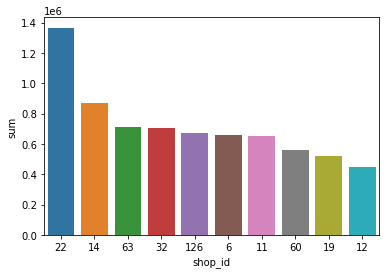

In [16]:
sns.barplot(data=order_top10 , x=order_top10.index, y='sum', order=order_top10.index)

<AxesSubplot:xlabel='shop_id', ylabel='sum'>

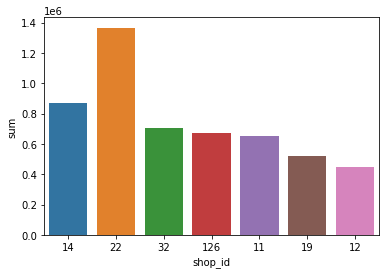

In [17]:
sns.barplot(data=order_top10, x=order_top10.index, y='sum', order=[14,22,32,126,11,19,12])

**4. 시간대별 C팀 매출을 구하려고 합니다. lineplot을 이용하여 6월 11일의 시간대별 매출을 시각화 해주세요.**

C팀 이용자들의 구매 패턴을 알아보려고 합니다. timestamp를 to_datetime을 이용하여 datetime 자료형으로 만든 뒤, 이를 이용하여 시간대별 총 매출량을 구해주세요.

x를 timestamp, y를 price로 놓는 경우 다음과 같은 그래프가 나오게 됩니다. 

![](https://i.imgur.com/5cqEAAj.png)

In [21]:
## 시각화 표현을 위한 Import :
import matplotlib as mpl
sns.set_style('whitegrid') #스타일은 원하는 것을 사용하세요.
mpl.rc('font', family='AppleGothic') # Mac의 경우는 AppleGothic, 윈도우의 경우는 Malgun Gothic을 사용하면 됩니다 :) 
mpl.rc('axes', unicode_minus=False)
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

/var/folders/2w/p0zgpvps62gb8jlzgy_v7zgh0000gn/T/ipykernel_6981/1129832502.py:7: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')


In [22]:
# timestamp 데이터형 변환 : 이유> 시간이 오래걸림 (object 형 -> datetime64 형으로 변환)
order['timestamp'] = pd.to_datetime(order['timestamp'])
order['timestamp'].head(3)

0   2018-06-11 00:00:43.032
1   2018-06-11 00:02:33.763
2   2018-06-11 00:04:06.364
Name: timestamp, dtype: datetime64[ns]

<AxesSubplot:xlabel='timestamp', ylabel='price'>

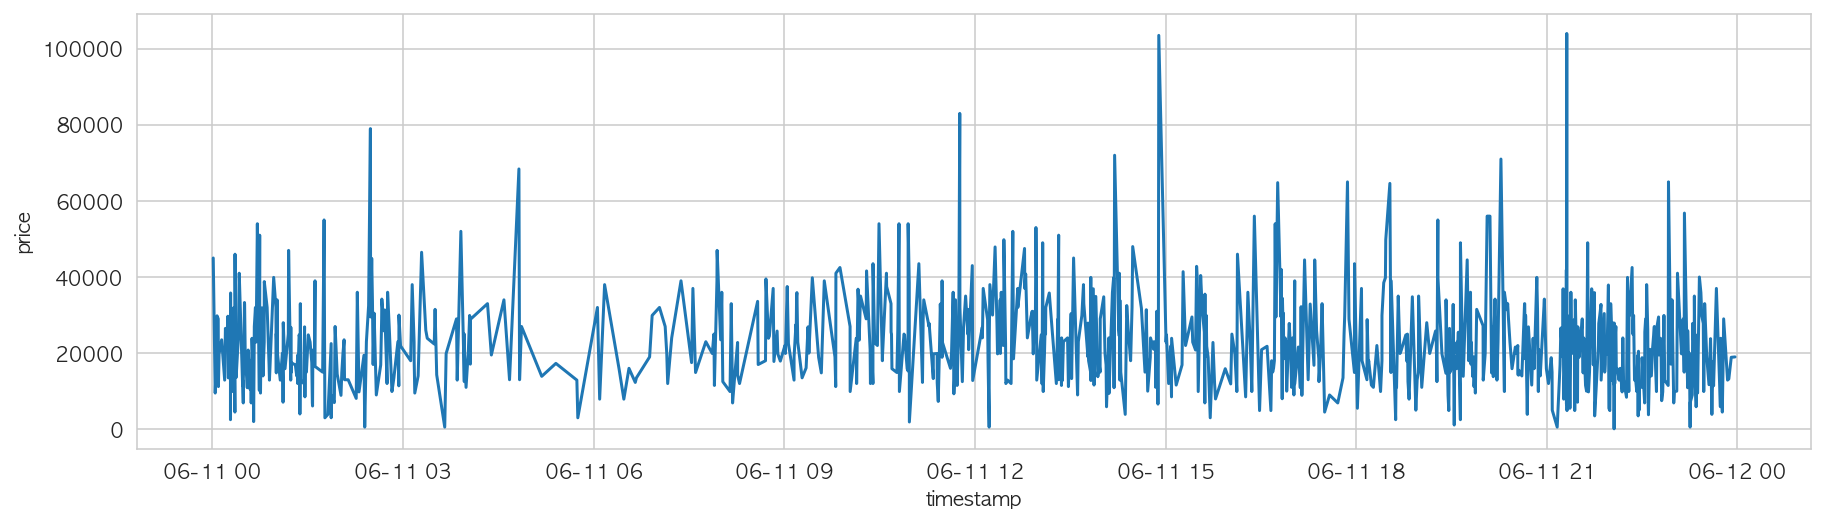

In [23]:
plt.figure(figsize=(15, 4))
sns.lineplot(data=order, x='timestamp', y='price')       # lineplot 으로 그려본다

**5. 위의 시각화를 구간화(binning) 작업을 거쳐 보기 좋은 형태로 만들어주세요.**

위의 시각화는 적절하지 못한 시각화입니다. 정확하게는 x시 00분 ~ x시 59분 까지의 매출을 시간대별로 모두 합하는 binning 과정을 거친 뒤 시각화를 진행해야 원하는 결과를 얻을 수 있습니다.

order 테이블에 로그의 발생 시간을 나타내는 hour 칼럼을 추가한 뒤, pivot_table을 이용하여 시간대별 매출을 구해주세요. 그리고, 이를 이용해 아래와 같은 그래프를 만들어 주세요.

*lineplot을 사용하는 경우*
![](https://i.imgur.com/sGVLJKi.png)

*pointplot을 사용하는 경우*
![](https://i.imgur.com/hYuKVqE.png)

In [24]:
#Write your code here!
# timestamp 를 이용하여 hour 컬럼 추가 :
order['hour'] = order['timestamp'].dt.hour
order.head(3)

,timestamp,user_id,goods_id,shop_id,price,hour
0,2018-06-11 00:00:43.032,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,1414,38,45000,0
1,2018-06-11 00:02:33.763,smDmRnykg61KajpxXKzQ0oNkrh2nuSBj,1351,12,9500,0
2,2018-06-11 00:04:06.364,EyGjKYtSqZgqJ1ddKCtH5XwGirTyOH2P,646,14,22000,0


In [25]:
order.tail(3)

,timestamp,user_id,goods_id,shop_id,price,hour
864,2018-06-11 23:51:54.449,wuK4KeAhonDy4KHxO8D60fFQsxoo_34c,5318,181,13200,23
865,2018-06-11 23:54:11.765,GU1JdCza2vj7N-0_YN3JOftW7SRXkWDi,2989,19,18900,23
866,2018-06-11 23:57:47.896,6xq2ibp39i7HaiTt_dOwWfpMC5UlFLhJ,1659,22,19000,23


In [26]:
df_pivot_hour = pd.pivot_table(data=order, index='hour', values='price', aggfunc='sum')
df_pivot_hour.head(3)

,price
hour,
0,1479210
1,990300
2,787830


/var/folders/2w/p0zgpvps62gb8jlzgy_v7zgh0000gn/T/ipykernel_6981/1344030545.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(y_value)


[Text(0, 0.0, '0'),
 Text(0, 200000.0, '200,000'),
 Text(0, 400000.0, '400,000'),
 Text(0, 600000.0, '600,000'),
 Text(0, 800000.0, '800,000'),
 Text(0, 1000000.0, '1,000,000'),
 Text(0, 1200000.0, '1,200,000'),
 Text(0, 1400000.0, '1,400,000'),
 Text(0, 1600000.0, '1,600,000')]

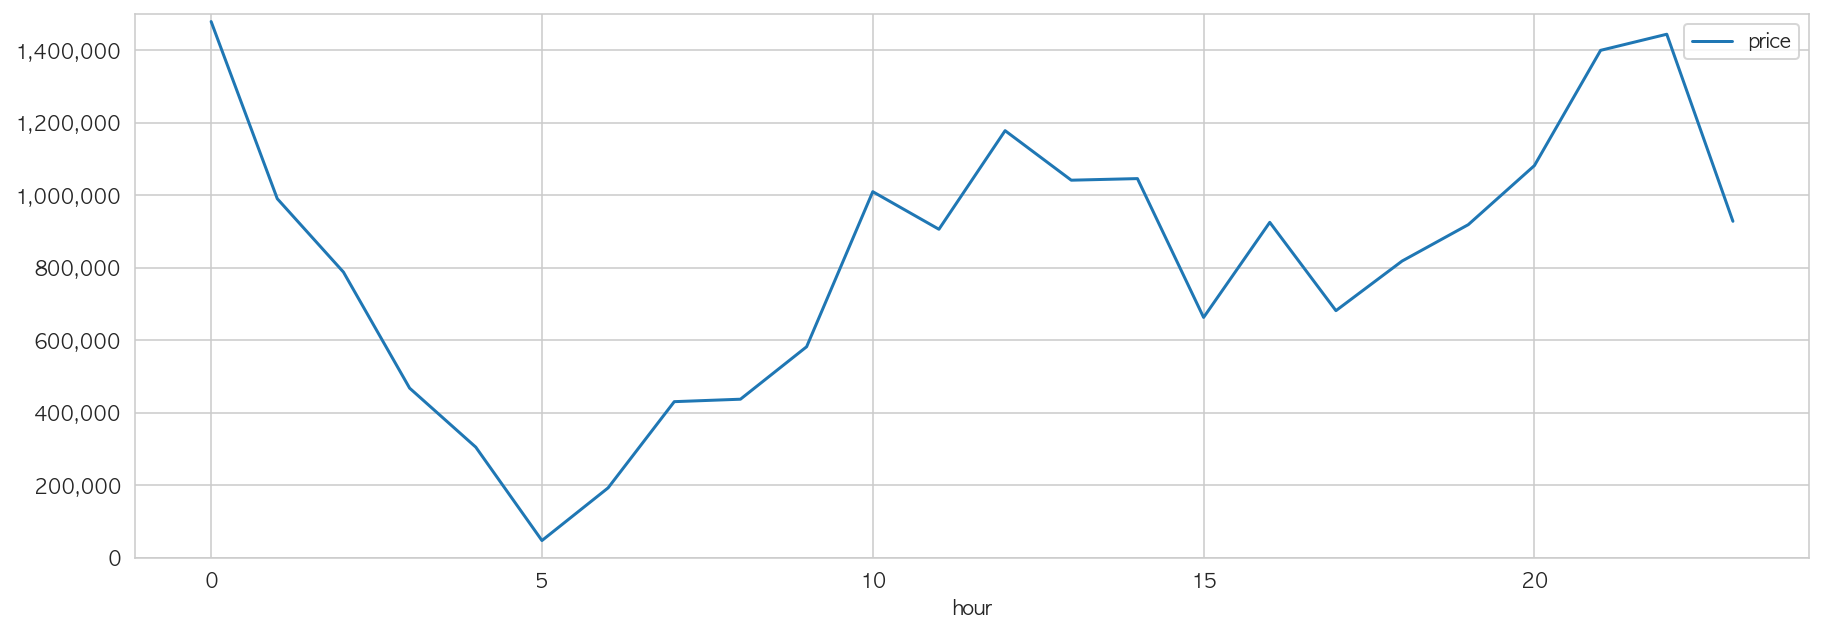

In [27]:
#Write your code here!
#print(data['price'].dtype)
plt.figure(figsize=(15,5))
plt.ylim(0, 1500000)
data = pd.pivot_table(data=order, index='hour', values='price', aggfunc='sum')
ax = sns.lineplot(data=data)
y_value=['{:,.0f}'.format(x) for x in ax.get_yticks()]
ax.set_yticklabels(y_value)

/var/folders/2w/p0zgpvps62gb8jlzgy_v7zgh0000gn/T/ipykernel_6981/2782025042.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(y_value)


[Text(0, 0.0, '0'),
 Text(0, 200000.0, '200,000'),
 Text(0, 400000.0, '400,000'),
 Text(0, 600000.0, '600,000'),
 Text(0, 800000.0, '800,000'),
 Text(0, 1000000.0, '1,000,000'),
 Text(0, 1200000.0, '1,200,000'),
 Text(0, 1400000.0, '1,400,000'),
 Text(0, 1600000.0, '1,600,000')]

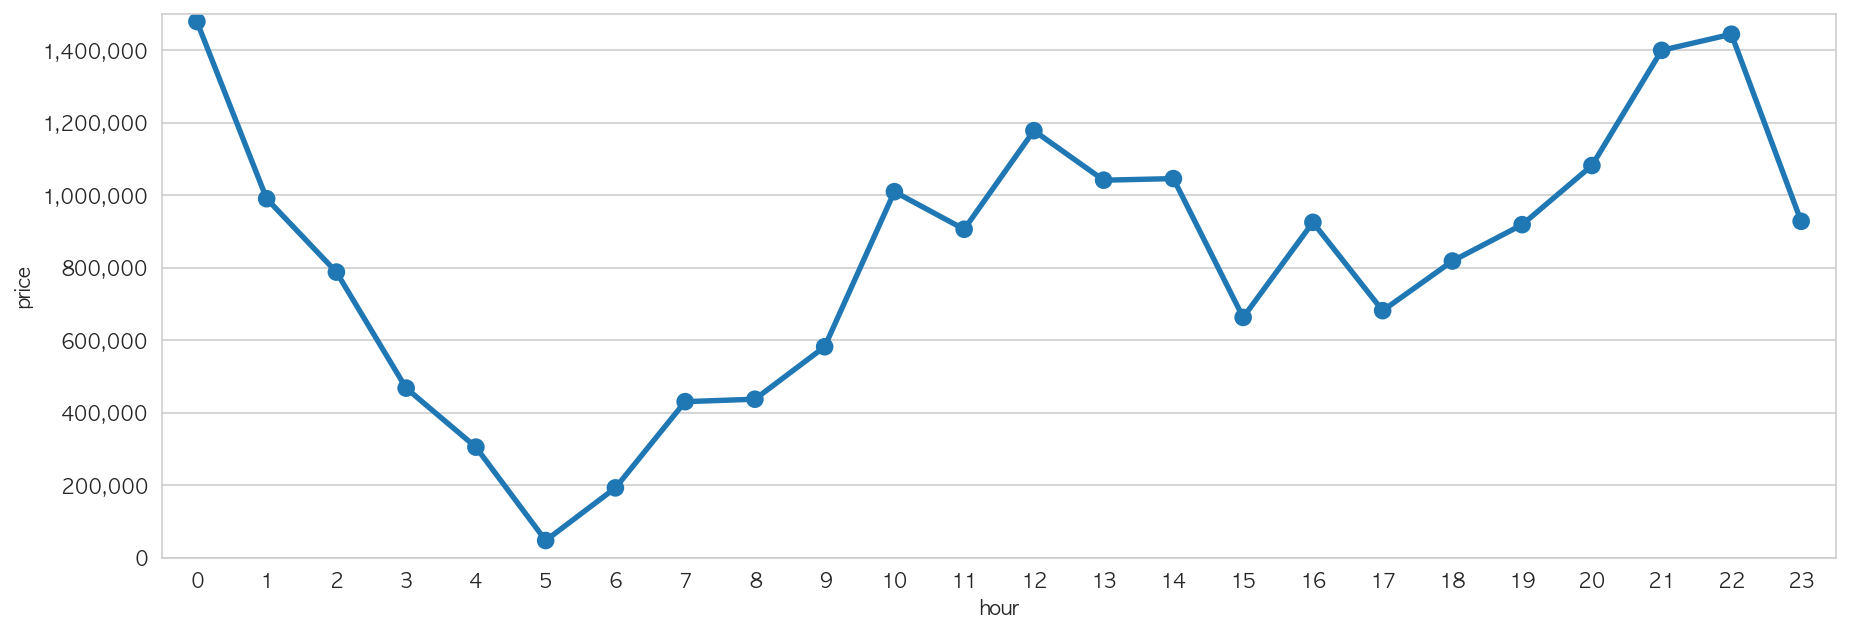

In [28]:
#Write your code here!
#print(data['price'].dtype)
plt.figure(figsize=(15,5))
plt.ylim(0, 1500000)
data = pd.pivot_table(data=order, index='hour', values='price', aggfunc='sum')
ax = sns.pointplot(data=data, x=data.index, y=data['price'])
y_value=['{:,.0f}'.format(x) for x in ax.get_yticks()]
ax.set_yticklabels(y_value)

In [29]:
y_value

['0',
 '200,000',
 '400,000',
 '600,000',
 '800,000',
 '1,000,000',
 '1,200,000',
 '1,400,000',
 '1,600,000']

In [30]:
data.index

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23],
           dtype='int64', name='hour')

**6 . user 테이블을 불러와 order 테이블과 병합해주세요.**

user 테이블에는 고객의 고유 아이디를 나타내는 user_id, 그리고 접속 기기정보를 나타내는 os, 그리고 나이정보 age가 있습니다. 이를 이용해 top 10 쇼핑몰 매출이 어떤 연령층에서 발생했는지 분석하고자 합니다. 데이터베이스에서 user 테이블을 불러온 뒤, order 테이블과 병합해주세요.

병합 결과는 다음과 같이 나오게 됩니다.

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>timestamp</th>
      <th>user_id</th>
      <th>goods_id</th>
      <th>shop_id</th>
      <th>price</th>
      <th>hour</th>
      <th>os</th>
      <th>age</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>2018-06-11 00:00:43.032</td>
      <td>bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx</td>
      <td>1414</td>
      <td>38</td>
      <td>45000</td>
      <td>0</td>
      <td>iOS</td>
      <td>39</td>
    </tr>
    <tr>
      <th>1</th>
      <td>2018-06-11 00:02:33.763</td>
      <td>smDmRnykg61KajpxXKzQ0oNkrh2nuSBj</td>
      <td>1351</td>
      <td>12</td>
      <td>9500</td>
      <td>0</td>
      <td>And</td>
      <td>17</td>
    </tr>
    <tr>
      <th>2</th>
      <td>2018-06-11 00:04:06.364</td>
      <td>EyGjKYtSqZgqJ1ddKCtH5XwGirTyOH2P</td>
      <td>646</td>
      <td>14</td>
      <td>22000</td>
      <td>0</td>
      <td>And</td>
      <td>-1</td>
    </tr>
    <tr>
      <th>3</th>
      <td>2018-06-11 00:04:17.258</td>
      <td>KQBGi33Zxh5Dgu0WEkOkjN0YqTT_wxC3</td>
      <td>5901</td>
      <td>46</td>
      <td>29800</td>
      <td>0</td>
      <td>And</td>
      <td>34</td>
    </tr>
    <tr>
      <th>4</th>
      <td>2018-06-11 00:05:26.010</td>
      <td>lq1Je3voA3a0MouSFba3629lKCvweI24</td>
      <td>5572</td>
      <td>89</td>
      <td>29000</td>
      <td>0</td>
      <td>And</td>
      <td>17</td>
    </tr>
  </tbody>
</table>

In [31]:
#Write your code here!
order.head(3)

,timestamp,user_id,goods_id,shop_id,price,hour
0,2018-06-11 00:00:43.032,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,1414,38,45000,0
1,2018-06-11 00:02:33.763,smDmRnykg61KajpxXKzQ0oNkrh2nuSBj,1351,12,9500,0
2,2018-06-11 00:04:06.364,EyGjKYtSqZgqJ1ddKCtH5XwGirTyOH2P,646,14,22000,0


In [32]:
order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 867 entries, 0 to 866
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  867 non-null    datetime64[ns]
 1   user_id    867 non-null    object        
 2   goods_id   867 non-null    int64         
 3   shop_id    867 non-null    int64         
 4   price      867 non-null    int64         
 5   hour       867 non-null    int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 40.8+ KB


In [33]:
#Write your code here!
query = "select * from 'user'"
user = pd.read_sql(query, conn)
user.head()

,user_id,os,age
0,--PYPMX8QWg0ioT5zfORmU-S5Lln0lot,And,41
1,-16-xXbeDcvkZJtTpRwMi57Yo2ZQpORv,iOS,31
2,-1de9sT-MLwVVvnC0ncCLnqEqpSi3XSN,iOS,16
3,-3A3L2jnM55B_Q1bRXMjZ6sPnINIj-Y1,And,41
4,-3bhcSgPOIdQAPkPNcchxvECGqGQQ78k,And,42


In [34]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  10000 non-null  object
 1   os       10000 non-null  object
 2   age      10000 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 234.5+ KB


In [35]:
query = """                                         
    select *
    from 'order' INNER JOIN 'user'
      ON 'order'.user_id = 'user'.user_id
"""
pd.read_sql(query, conn).head(3)

,timestamp,user_id,goods_id,shop_id,price,user_id,os,age
0,2018-06-11 00:00:43.032,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,1414,38,45000,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,iOS,39
1,2018-06-11 00:02:33.763,smDmRnykg61KajpxXKzQ0oNkrh2nuSBj,1351,12,9500,smDmRnykg61KajpxXKzQ0oNkrh2nuSBj,And,17
2,2018-06-11 00:04:06.364,EyGjKYtSqZgqJ1ddKCtH5XwGirTyOH2P,646,14,22000,EyGjKYtSqZgqJ1ddKCtH5XwGirTyOH2P,And,-1


In [36]:
len(pd.read_sql(query, conn))

867

In [37]:
pd.merge(order, user, how='inner', on='user_id')

,timestamp,user_id,goods_id,shop_id,price,hour,os,age
0,2018-06-11 00:00:43.032,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,1414,38,45000,0,iOS,39
1,2018-06-11 00:02:33.763,smDmRnykg61KajpxXKzQ0oNkrh2nuSBj,1351,12,9500,0,And,17
2,2018-06-11 00:04:06.364,EyGjKYtSqZgqJ1ddKCtH5XwGirTyOH2P,646,14,22000,0,And,-1
3,2018-06-11 00:04:17.258,KQBGi33Zxh5Dgu0WEkOkjN0YqTT_wxC3,5901,46,29800,0,And,34
4,2018-06-11 00:05:26.010,lq1Je3voA3a0MouSFba3629lKCvweI24,5572,89,29000,0,And,17
...,...,...,...,...,...,...,...,...
862,2018-06-11 23:47:02.003,i_Ar2GyU8xAEeQwzJm6wr60VDB6ofOpK,1065,61,29000,23,iOS,15
863,2018-06-11 23:50:42.202,49JWS9E7KuSnvv1B7uqMnsiT82ZmtRlO,502,12,12900,23,And,19
864,2018-06-11 23:51:54.449,wuK4KeAhonDy4KHxO8D60fFQsxoo_34c,5318,181,13200,23,And,26
865,2018-06-11 23:54:11.765,GU1JdCza2vj7N-0_YN3JOftW7SRXkWDi,2989,19,18900,23,iOS,27


In [38]:
user_order = pd.merge(order, user, how='inner', left_on='user_id', right_on='user_id') 
user_order

,timestamp,user_id,goods_id,shop_id,price,hour,os,age
0,2018-06-11 00:00:43.032,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,1414,38,45000,0,iOS,39
1,2018-06-11 00:02:33.763,smDmRnykg61KajpxXKzQ0oNkrh2nuSBj,1351,12,9500,0,And,17
2,2018-06-11 00:04:06.364,EyGjKYtSqZgqJ1ddKCtH5XwGirTyOH2P,646,14,22000,0,And,-1
3,2018-06-11 00:04:17.258,KQBGi33Zxh5Dgu0WEkOkjN0YqTT_wxC3,5901,46,29800,0,And,34
4,2018-06-11 00:05:26.010,lq1Je3voA3a0MouSFba3629lKCvweI24,5572,89,29000,0,And,17
...,...,...,...,...,...,...,...,...
862,2018-06-11 23:47:02.003,i_Ar2GyU8xAEeQwzJm6wr60VDB6ofOpK,1065,61,29000,23,iOS,15
863,2018-06-11 23:50:42.202,49JWS9E7KuSnvv1B7uqMnsiT82ZmtRlO,502,12,12900,23,And,19
864,2018-06-11 23:51:54.449,wuK4KeAhonDy4KHxO8D60fFQsxoo_34c,5318,181,13200,23,And,26
865,2018-06-11 23:54:11.765,GU1JdCza2vj7N-0_YN3JOftW7SRXkWDi,2989,19,18900,23,iOS,27


**7. 매출 Top 10 쇼핑몰 구매자들의 연령대를 쇼핑몰별로 시각화하여 보여주세요.**

위의 병합된 테이블을 이용하여, 당일 매출 Top 10 쇼핑몰에서 구매를 한 고객들의 연령대 분포를 시각화로 표현하고자 합니다. 이를 이용해 쇼핑몰이 설정한 타겟 연령대와 실제 구매층이 일치하는지를 비교해보고자 합니다.

나이 정보가 없는 경우는 -1이 입력되어 있기 때문에 이를 처리한 다음 시각화를 해야 합니다. 시각화 결과가 아래의 둘 중 하나가 나오게 해주세요.

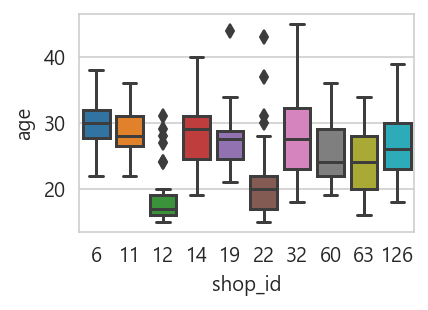

In [39]:
pd.np.nan

/var/folders/2w/p0zgpvps62gb8jlzgy_v7zgh0000gn/T/ipykernel_6981/2269831909.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  pd.np.nan


nan

In [40]:
#Write your code here!
user_order.loc[ user_order['age'] == -1, 'age'] = pd.np.nan

/var/folders/2w/p0zgpvps62gb8jlzgy_v7zgh0000gn/T/ipykernel_6981/3394958686.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  user_order.loc[ user_order['age'] == -1, 'age'] = pd.np.nan


In [41]:
order_top10.index

Int64Index([22, 14, 63, 32, 126, 6, 11, 60, 19, 12], dtype='int64', name='shop_id')

In [42]:
order_top10_index = order_top10.index
usr_grp = user_order.loc[user_order['shop_id'].isin(order_top10_index)]

In [43]:
usr_grp
#len(usr_grp)

,timestamp,user_id,goods_id,shop_id,price,hour,os,age
1,2018-06-11 00:02:33.763,smDmRnykg61KajpxXKzQ0oNkrh2nuSBj,1351,12,9500,0,And,17.0
2,2018-06-11 00:04:06.364,EyGjKYtSqZgqJ1ddKCtH5XwGirTyOH2P,646,14,22000,0,And,NaN
5,2018-06-11 00:05:35.182,GM0-EsJPHjkpteIpAQIwaCdUjU81lhW1,55,22,11200,0,iOS,21.0
6,2018-06-11 00:06:14.314,lgvWxrv7r5RGklXSJqM2x6NUBZ5H-RQZ,2451,22,19800,0,iOS,22.0
7,2018-06-11 00:08:39.716,LZZ0ktGq6hW685TFAQfcGNhsKVUEceHl,4278,60,23500,0,iOS,24.0
9,2018-06-11 00:11:30.954,Evz6xmsye1BP7i33rr_RAjwBRZ_AOsTZ,686,22,12900,0,And,27.0
10,2018-06-11 00:12:12.469,_t38UxRGHDKAsgc7nJhxz0e7q3pIj-RD,4521,19,26500,0,iOS,44.0
16,2018-06-11 10:53:34.715,hZrcB-RV5EqL94ysDGcrQ1TZKlhSeS7L,6365,22,24700,10,iOS,26.0
20,2018-06-11 00:17:45.978,B3yaMZ62HOH0shQOKjo4QPV6PLcobUsT,6242,63,18900,0,iOS,28.0
21,2018-06-11 00:18:21.226,-L2Awbp23c9b1o1R_do--BZEtPivAUua,2941,126,23900,0,iOS,26.0


In [44]:
order_top10.index

Int64Index([22, 14, 63, 32, 126, 6, 11, 60, 19, 12], dtype='int64', name='shop_id')

In [45]:
usr_grp = usr_grp[['shop_id', 'age']]
usr_grp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359 entries, 1 to 866
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   shop_id  359 non-null    int64  
 1   age      347 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 8.4 KB


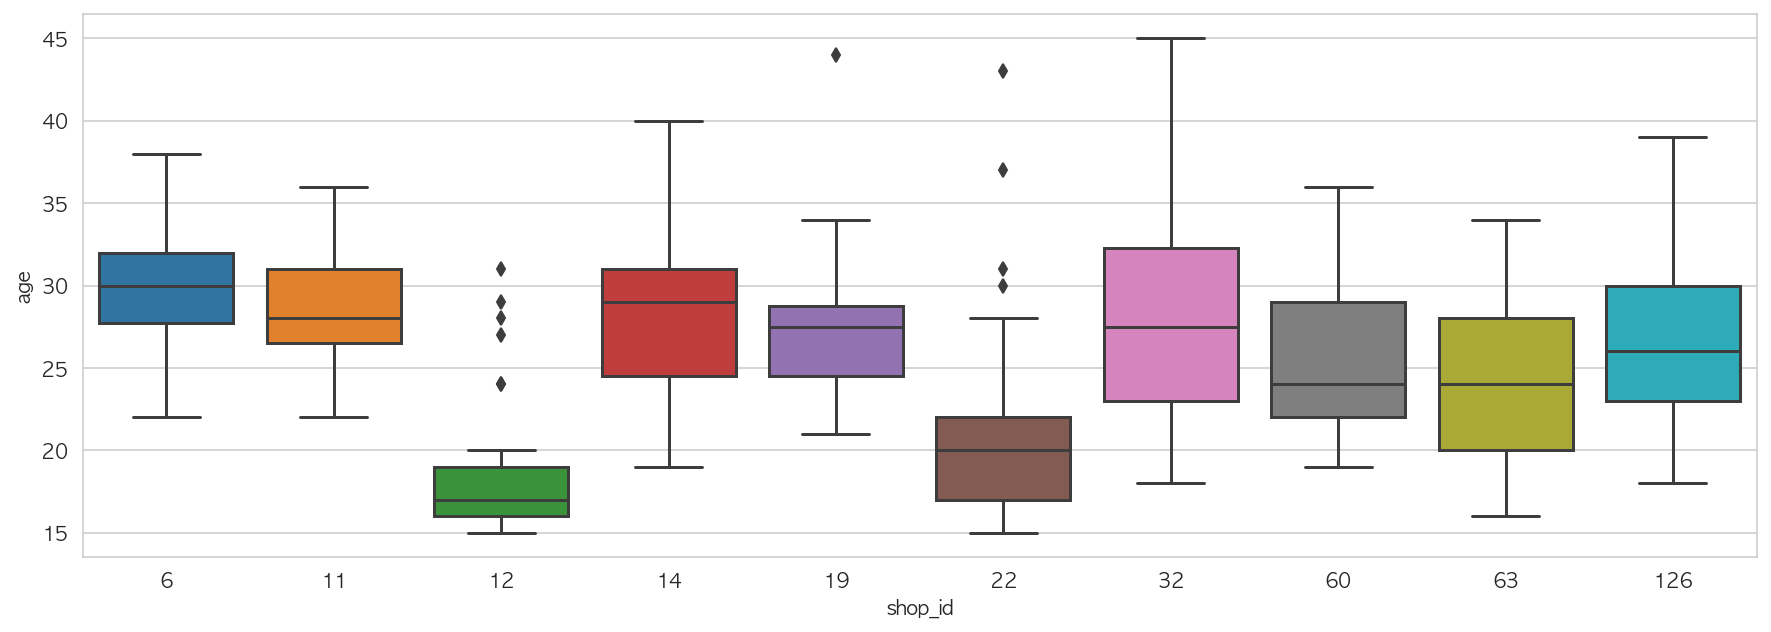

In [46]:
plt.figure(figsize=(15,5))
sns.boxplot(x=usr_grp['shop_id'], y=usr_grp['age'], data=usr_grp)
plt.show()

**8. user 테이블에 연령대를 나타내는 칼럼을 만들어주세요. 그리고 쇼핑몰이 설정한 타겟 연령대와 실제로 구매를 한 고객의 연령과 일치하는지를 검증해주세요.**

C팀의 쇼핑몰들은 아래의 필터에서 보여지는 것과 같이 타겟 연령대를 가지고 있습니다. 하지만, 실제 구매가 설정되어 있는 타겟 연령대에 맞게 이루어지는지 꾸준히 검증이 이루어져야 합니다. 유저에게 더 적합한 제품이나 쇼핑몰을 추천해주어 유저 경험 (UX)를 증진시키는 것은 추천 플랫폼에게 매우 중요한 요소이기 때문입니다.

<img src="https://i.imgur.com/HMd9xC2.jpg" width=300>

수행해야 할 작업은 총 3단계입니다.

    1. 실제 나이를 바탕으로 user 테이블에 연령대 칼럼을 만들기
    2. shop 테이블을 불러와 user, order 테이블과 병합하기
    3. 쇼핑몰의 타겟 연령대와 해당 쇼핑몰에서의 결제를 한 고객의 연령대를 비교하기

아래의 함수를 이용해 user 테이블에 연령대를 만들어주세요.

In [79]:
def make_generation(age):
    if age == -1:
        return '미입력'
    elif age // 10 >= 4:
        return "30대 후반"
    elif age // 10 == 1:
        return "10대"
    elif age % 10 <= 3:
        return str(age // 10 * 10) + f"대 초반"
    elif age % 10 <= 6:
        return str(age // 10 * 10) + f"대 중반"
    else:
        return str(age // 10 * 10) + f"대 후반"

In [80]:
print(make_generation(-1))
print(make_generation(10))
print(make_generation(23))
print(make_generation(25))
print(make_generation(29))
print(make_generation(32))
print(make_generation(35))
print(make_generation(45))

미입력
10대
20대 초반
20대 중반
20대 후반
30대 초반
30대 중반
30대 후반


In [81]:
#Write your code here!
user['연령대'] = user['age'].apply(make_generation)
user

,user_id,os,age,연령대
0,--PYPMX8QWg0ioT5zfORmU-S5Lln0lot,And,41,30대 후반
1,-16-xXbeDcvkZJtTpRwMi57Yo2ZQpORv,iOS,31,30대 초반
2,-1de9sT-MLwVVvnC0ncCLnqEqpSi3XSN,iOS,16,10대
3,-3A3L2jnM55B_Q1bRXMjZ6sPnINIj-Y1,And,41,30대 후반
4,-3bhcSgPOIdQAPkPNcchxvECGqGQQ78k,And,42,30대 후반
...,...,...,...,...
9995,zymqXr4nryoIrj8e9ToeLoNbnOfCvcsM,And,17,10대
9996,zyugPCF7YB6Fksn51adQa3CpAIn1SwIf,And,28,20대 후반
9997,zz-aNy7UWfvyrZxO4Fs4K5ewmqZVaMOs,iOS,28,20대 후반
9998,zznj-LHhddVvuzZmbZpw6MSylLO64982,And,27,20대 후반


In [82]:
query = "SELECT * FROM 'shop'"
shop = pd.read_sql(query, conn)
shop

,shop_id,name,category,age,style
0,1,Edna,의류,20대 중반/20대 후반/30대 초반,모던시크/러블리
1,2,Pam,의류,20대 중반/20대 후반/30대 초반,러블리/심플베이직
2,3,Carolyn,의류,20대 중반/20대 후반/30대 초반,모던시크/심플베이직
3,4,Joan,의류,30대 초반/30대 중반,미시스타일/유니크
4,5,Florene,의류,20대 중반/20대 후반/30대 초반,심플베이직/헐리웃스타일
5,6,Ashley,의류,20대 중반/20대 후반/30대 초반,심플베이직/러블리
6,7,Sharilyn,의류,30대 초반/30대 중반/30대 후반,미시스타일/모던시크
7,8,Kelli,의류,30대 초반/30대 중반/30대 후반,모던시크/미시스타일
8,9,Marth,의류,20대 후반/30대 초반/30대 중반,미시스타일/심플베이직
9,10,Alexandra,의류,30대 초반/30대 중반/30대 후반,심플베이직/모던시크


In [83]:
order

,timestamp,user_id,goods_id,shop_id,price,hour
0,2018-06-11 00:00:43.032,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,1414,38,45000,0
1,2018-06-11 00:02:33.763,smDmRnykg61KajpxXKzQ0oNkrh2nuSBj,1351,12,9500,0
2,2018-06-11 00:04:06.364,EyGjKYtSqZgqJ1ddKCtH5XwGirTyOH2P,646,14,22000,0
3,2018-06-11 00:04:17.258,KQBGi33Zxh5Dgu0WEkOkjN0YqTT_wxC3,5901,46,29800,0
4,2018-06-11 00:05:26.010,lq1Je3voA3a0MouSFba3629lKCvweI24,5572,89,29000,0
...,...,...,...,...,...,...
862,2018-06-11 23:47:02.003,i_Ar2GyU8xAEeQwzJm6wr60VDB6ofOpK,1065,61,29000,23
863,2018-06-11 23:50:42.202,49JWS9E7KuSnvv1B7uqMnsiT82ZmtRlO,502,12,12900,23
864,2018-06-11 23:51:54.449,wuK4KeAhonDy4KHxO8D60fFQsxoo_34c,5318,181,13200,23
865,2018-06-11 23:54:11.765,GU1JdCza2vj7N-0_YN3JOftW7SRXkWDi,2989,19,18900,23


shop 테이블을 DB에서 불러와 주세요. 그 다음, user, order 테이블과 병합해주세요.

병합 결과는 다음과 같게 됩니다.

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>timestamp</th>
      <th>user_id</th>
      <th>goods_id</th>
      <th>shop_id</th>
      <th>price</th>
      <th>hour</th>
      <th>os</th>
      <th>age_x</th>
      <th>연령대</th>
      <th>name</th>
      <th>category</th>
      <th>age_y</th>
      <th>style</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>2018-06-11 00:00:43.032</td>
      <td>bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx</td>
      <td>1414</td>
      <td>38</td>
      <td>45000</td>
      <td>0</td>
      <td>iOS</td>
      <td>39</td>
      <td>30대 후반</td>
      <td>Mabel</td>
      <td>의류</td>
      <td>20대 후반/30대 초반/30대 중반</td>
      <td>모던시크/페미닌</td>
    </tr>
    <tr>
      <th>1</th>
      <td>2018-06-11 07:33:39.823</td>
      <td>ni3NQK35j-YaSxli-C_Sz7ZmQqOwMljL</td>
      <td>2278</td>
      <td>38</td>
      <td>37000</td>
      <td>7</td>
      <td>And</td>
      <td>32</td>
      <td>30대 초반</td>
      <td>Mabel</td>
      <td>의류</td>
      <td>20대 후반/30대 초반/30대 중반</td>
      <td>모던시크/페미닌</td>
    </tr>
    <tr>
      <th>2</th>
      <td>2018-06-11 12:56:27.867</td>
      <td>MnvhmV0tA89bN9TLXgRTbLza689bTkT9</td>
      <td>5513</td>
      <td>38</td>
      <td>31000</td>
      <td>12</td>
      <td>And</td>
      <td>37</td>
      <td>30대 후반</td>
      <td>Mabel</td>
      <td>의류</td>
      <td>20대 후반/30대 초반/30대 중반</td>
      <td>모던시크/페미닌</td>
    </tr>
    <tr>
      <th>3</th>
      <td>2018-06-11 22:57:11.582</td>
      <td>3Vo9NP0qU_176pgbqk6Cu-CY7kpJ2-WB</td>
      <td>7026</td>
      <td>38</td>
      <td>17100</td>
      <td>22</td>
      <td>iOS</td>
      <td>34</td>
      <td>30대 중반</td>
      <td>Mabel</td>
      <td>의류</td>
      <td>20대 후반/30대 초반/30대 중반</td>
      <td>모던시크/페미닌</td>
    </tr>
    <tr>
      <th>4</th>
      <td>2018-06-11 00:02:33.763</td>
      <td>smDmRnykg61KajpxXKzQ0oNkrh2nuSBj</td>
      <td>1351</td>
      <td>12</td>
      <td>9500</td>
      <td>0</td>
      <td>And</td>
      <td>17</td>
      <td>10대 후반</td>
      <td>Rachel</td>
      <td>의류</td>
      <td>10대/20대 초반</td>
      <td>러블리/심플베이직</td>
    </tr>
  </tbody>
</table>

In [84]:
#Write your code here!
query = "SELECT * FROM 'shop'"
shop = pd.read_sql(query, conn)
all = ( order.merge(user, on='user_id', how='inner')
             .merge(shop, on='shop_id', how='inner')
        )
all.head(1)

,timestamp,user_id,goods_id,shop_id,price,hour,os,age_x,연령대,name,category,age_y,style
0,2018-06-11 00:00:43.032,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,1414,38,45000,0,iOS,39,30대 후반,Mabel,의류,20대 후반/30대 초반/30대 중반,모던시크/페미닌


병합한 테이블을 이용하여 '거래연령 일치여부' 칼럼을 아래의 칼럼을 이용하여 만들어 주세요. 각 열이 아닌 각 행에 함수를 적용할 때는 `apply(function, axis=1)`을 이용해야 합니다.

In [53]:
all['연령대']

0      30대 후반
1      30대 초반
2      30대 후반
3      30대 중반
4         10대
        ...  
862    30대 초반
863    30대 후반
864    30대 초반
865       미입력
866    20대 중반
Name: 연령대, Length: 867, dtype: object

In [54]:
str(all['age_y'])

'0      20대 후반/30대 초반/30대 중반\n1      20대 후반/30대 초반/30대 중반\n2      20대 후반/30대 초반/30대 중반\n3      20대 후반/30대 초반/30대 중반\n4                10대/20대 초반\n               ...         \n862                    None\n863    30대 초반/30대 중반/30대 후반\n864                    None\n865    20대 초반/20대 중반/20대 후반\n866    20대 초반/20대 중반/20대 후반\nName: age_y, Length: 867, dtype: object'

In [55]:
def check_generation(row):
    if row['category'] == '의류' and row['연령대'] == '미입력':
        return True
    else:
        return row['연령대'] in str(row['age_y'])

피벗 테이블을 이용한 결과가 다음과 같이 나오게 됩니다.

<table border="1" class="dataframe">
  <thead>
    <tr>
      <th></th>
      <th>mean</th>
      <th>count</th>
    </tr>
    <tr>
      <th></th>
      <th>거래연령 일치여부</th>
      <th>거래연령 일치여부</th>
    </tr>
    <tr>
      <th>shop_id</th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1</th>
      <td>0.666667</td>
      <td>3</td>
    </tr>
    <tr>
      <th>2</th>
      <td>0.937500</td>
      <td>16</td>
    </tr>
    <tr>
      <th>3</th>
      <td>0.400000</td>
      <td>5</td>
    </tr>
    <tr>
      <th>4</th>
      <td>1.000000</td>
      <td>1</td>
    </tr>
    <tr>
      <th>5</th>
      <td>0.000000</td>
      <td>1</td>
    </tr>
  </tbody>
</table>

In [56]:
all.apply(check_generation, axis=1)

0      False
1       True
2      False
3       True
4       True
       ...  
862    False
863     True
864    False
865     True
866     True
Length: 867, dtype: bool

In [57]:
#Write your code here!
all['거래연령 일치여부'] = all.apply(check_generation, axis=1)
all.head(2)

,timestamp,user_id,goods_id,shop_id,price,hour,os,age_x,연령대,name,category,age_y,style,거래연령 일치여부
0,2018-06-11 00:00:43.032,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,1414,38,45000,0,iOS,39,30대 후반,Mabel,의류,20대 후반/30대 초반/30대 중반,모던시크/페미닌,False
1,2018-06-11 07:33:39.823,ni3NQK35j-YaSxli-C_Sz7ZmQqOwMljL,2278,38,37000,7,And,32,30대 초반,Mabel,의류,20대 후반/30대 초반/30대 중반,모던시크/페미닌,True


In [58]:
table = pd.pivot_table(all, values='거래연령 일치여부', index='shop_id',
               aggfunc=['mean', 'count'])
table.head()

,mean,count
,거래연령 일치여부,거래연령 일치여부
shop_id,,
1,0.666667,3
2,0.937500,16
3,0.800000,5
4,1.000000,1
5,1.000000,1


위의 정보를 Top 10 쇼핑몰에 대해 뽑아보면 다음과 같은 결과가 나옵니다. 

In [59]:
table[table.index.isin(order_top10_index)]

,mean,count
,거래연령 일치여부,거래연령 일치여부
shop_id,,
6,0.791667,24
11,0.684211,19
12,0.857143,42
14,0.566667,30
19,0.789474,19
22,0.929293,99
32,0.540541,37
60,0.695652,23


의류이외의 제품을 파는 쇼핑몰은 타겟 연령층이 없기 떄문에 일치여부가 0이 나옵니다. 일치여부가 낮은 쇼핑몰의 경우는 더 긴 기간의 로그를 모니터링 한 다음, 태그 수정을 제안하여 타겟 적합도를 높일 수 있습니다.

**9. 쇼핑몰의 스타일 태그를 정리해주세요.**

쇼핑몰별로 제품군의 스타일을 나타낼 수 있는 태그를 가지고 있습니다. 이 태그는 다음의 리스트에 정리되어 있습니다.

In [60]:
style_list = ['페미닌', '모던시크', '심플베이직', '러블리', '유니크', '미시스타일', '캠퍼스룩', '빈티지', '섹시글램', '스쿨룩', '로맨틱', '오피스룩',
              '럭셔리', '헐리웃스타일', '심플시크', '키치', '펑키', '큐티', '볼드&에스닉' ]

In [61]:
len(style_list)

19

위의 스타일을 정리하여 shop 테이블을 전처리해 아래와 같은 테이블을 만들어주세요.

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>name</th>
      <th>category</th>
      <th>age</th>
      <th>style</th>
      <th>페미닌</th>
      <th>모던시크</th>
      <th>심플베이직</th>
      <th>러블리</th>
      <th>유니크</th>
      <th>미시스타일</th>
      <th>캠퍼스룩</th>
      <th>빈티지</th>
      <th>섹시글램</th>
      <th>스쿨룩</th>
      <th>로맨틱</th>
      <th>오피스룩</th>
      <th>럭셔리</th>
      <th>헐리웃스타일</th>
      <th>심플시크</th>
      <th>키치</th>
      <th>펑키</th>
      <th>큐티</th>
      <th>볼드&amp;에스닉</th>
    </tr>
    <tr>
      <th>shop_id</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1</th>
      <td>Edna</td>
      <td>의류</td>
      <td>20대 중반/20대 후반/30대 초반</td>
      <td>모던시크/러블리</td>
      <td>False</td>
      <td>True</td>
      <td>False</td>
      <td>True</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
    </tr>
    <tr>
      <th>2</th>
      <td>Pam</td>
      <td>의류</td>
      <td>20대 중반/20대 후반/30대 초반</td>
      <td>러블리/심플베이직</td>
      <td>False</td>
      <td>False</td>
      <td>True</td>
      <td>True</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
    </tr>
    <tr>
      <th>3</th>
      <td>Carolyn</td>
      <td>의류</td>
      <td>20대 중반/20대 후반/30대 초반</td>
      <td>모던시크/심플베이직</td>
      <td>False</td>
      <td>True</td>
      <td>True</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
    </tr>
  </tbody>
</table>

예를 들어 shop_id가 1인 쇼핑몰의 스타일이 `모던시크/러블리`인 경우 모던시크 칼럼과 러블리 칼럼은 True 값을 가지고 나머지 칼럼은 False의 값을 가집니다.

In [62]:
shop.head()

,shop_id,name,category,age,style
0,1,Edna,의류,20대 중반/20대 후반/30대 초반,모던시크/러블리
1,2,Pam,의류,20대 중반/20대 후반/30대 초반,러블리/심플베이직
2,3,Carolyn,의류,20대 중반/20대 후반/30대 초반,모던시크/심플베이직
3,4,Joan,의류,30대 초반/30대 중반,미시스타일/유니크
4,5,Florene,의류,20대 중반/20대 후반/30대 초반,심플베이직/헐리웃스타일


In [63]:
#Write your code here!
## 첫번째 스타일
shop['style'].str.split('/').str[0]
## 두번째 스타일
#shop['style'].str.split('/').str[1]

0        모던시크
1         러블리
2        모던시크
3       미시스타일
4       심플베이직
5       심플베이직
6       미시스타일
7        모던시크
8       미시스타일
9       심플베이직
10       모던시크
11        러블리
12        페미닌
13        유니크
14        러블리
15      심플베이직
16      미시스타일
17       모던시크
18       섹시글램
19        유니크
20      심플베이직
21      심플베이직
22      미시스타일
23      심플베이직
24       모던시크
25       모던시크
26        페미닌
27        러블리
28        페미닌
29        페미닌
30        페미닌
31      심플베이직
32      심플베이직
33      심플베이직
34       모던시크
35       모던시크
36        페미닌
37       모던시크
38       모던시크
39      심플베이직
40        러블리
41      심플베이직
42       캠퍼스룩
43      심플베이직
44      심플베이직
45       모던시크
46      미시스타일
47      미시스타일
48       모던시크
49       모던시크
50      미시스타일
51        러블리
52       None
53        유니크
54      심플베이직
55       모던시크
56      미시스타일
57      미시스타일
58       None
59        러블리
60      심플베이직
61       모던시크
62       None
63       None
64       None
65       None
66       None
67       None
68       None
69        페미닌
70       심플시크
71    

In [64]:
new1 = pd.get_dummies(shop['style'].str.split('/').str[0])
new1

,러블리,럭셔리,로맨틱,모던시크,미시스타일,볼드&에스닉,빈티지,섹시글램,스쿨룩,심플베이직,심플시크,오피스룩,유니크,캠퍼스룩,큐티,키치,페미닌,헐리웃스타일
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
6,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [65]:
new2 = pd.get_dummies(shop['style'].str.split('/').str[1])
new2

,러블리,럭셔리,로맨틱,모던시크,미시스타일,빈티지,섹시글램,심플베이직,오피스룩,유니크,캠퍼스룩,페미닌,헐리웃스타일
0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,1
5,1,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,1,0,0,0,0,0,0,0,0,0
7,0,0,0,0,1,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,1,0,0,0,0,0
9,0,0,0,1,0,0,0,0,0,0,0,0,0


In [66]:
new = new1+new2
new

,러블리,럭셔리,로맨틱,모던시크,미시스타일,볼드&에스닉,빈티지,섹시글램,스쿨룩,심플베이직,심플시크,오피스룩,유니크,캠퍼스룩,큐티,키치,페미닌,헐리웃스타일
0,1,0,0,1,0,NaN,0,0,NaN,0,NaN,0,0,0,NaN,NaN,0,0
1,1,0,0,0,0,NaN,0,0,NaN,1,NaN,0,0,0,NaN,NaN,0,0
2,0,0,0,1,0,NaN,0,0,NaN,1,NaN,0,0,0,NaN,NaN,0,0
3,0,0,0,0,1,NaN,0,0,NaN,0,NaN,0,1,0,NaN,NaN,0,0
4,0,0,0,0,0,NaN,0,0,NaN,1,NaN,0,0,0,NaN,NaN,0,1
5,1,0,0,0,0,NaN,0,0,NaN,1,NaN,0,0,0,NaN,NaN,0,0
6,0,0,0,1,1,NaN,0,0,NaN,0,NaN,0,0,0,NaN,NaN,0,0
7,0,0,0,1,1,NaN,0,0,NaN,0,NaN,0,0,0,NaN,NaN,0,0
8,0,0,0,0,1,NaN,0,0,NaN,1,NaN,0,0,0,NaN,NaN,0,0
9,0,0,0,1,0,NaN,0,0,NaN,1,NaN,0,0,0,NaN,NaN,0,0


In [67]:
new = pd.DataFrame(new, columns=style_list).reindex(columns=style_list)
new

,페미닌,모던시크,심플베이직,러블리,유니크,미시스타일,캠퍼스룩,빈티지,섹시글램,스쿨룩,로맨틱,오피스룩,럭셔리,헐리웃스타일,심플시크,키치,펑키,큐티,볼드&에스닉
0,0,1,0,1,0,0,0,0,0,NaN,0,0,0,0,NaN,NaN,NaN,NaN,NaN
1,0,0,1,1,0,0,0,0,0,NaN,0,0,0,0,NaN,NaN,NaN,NaN,NaN
2,0,1,1,0,0,0,0,0,0,NaN,0,0,0,0,NaN,NaN,NaN,NaN,NaN
3,0,0,0,0,1,1,0,0,0,NaN,0,0,0,0,NaN,NaN,NaN,NaN,NaN
4,0,0,1,0,0,0,0,0,0,NaN,0,0,0,1,NaN,NaN,NaN,NaN,NaN
5,0,0,1,1,0,0,0,0,0,NaN,0,0,0,0,NaN,NaN,NaN,NaN,NaN
6,0,1,0,0,0,1,0,0,0,NaN,0,0,0,0,NaN,NaN,NaN,NaN,NaN
7,0,1,0,0,0,1,0,0,0,NaN,0,0,0,0,NaN,NaN,NaN,NaN,NaN
8,0,0,1,0,0,1,0,0,0,NaN,0,0,0,0,NaN,NaN,NaN,NaN,NaN
9,0,1,1,0,0,0,0,0,0,NaN,0,0,0,0,NaN,NaN,NaN,NaN,NaN


In [68]:
new = new.fillna(0)
new

,페미닌,모던시크,심플베이직,러블리,유니크,미시스타일,캠퍼스룩,빈티지,섹시글램,스쿨룩,로맨틱,오피스룩,럭셔리,헐리웃스타일,심플시크,키치,펑키,큐티,볼드&에스닉
0,0,1,0,1,0,0,0,0,0,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
1,0,0,1,1,0,0,0,0,0,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
2,0,1,1,0,0,0,0,0,0,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,0,1,1,0,0,0,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
4,0,0,1,0,0,0,0,0,0,0.0,0,0,0,1,0.0,0.0,0.0,0.0,0.0
5,0,0,1,1,0,0,0,0,0,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
6,0,1,0,0,0,1,0,0,0,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
7,0,1,0,0,0,1,0,0,0,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
8,0,0,1,0,0,1,0,0,0,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
9,0,1,1,0,0,0,0,0,0,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0.0


In [69]:
new = new.astype(bool)
new

,페미닌,모던시크,심플베이직,러블리,유니크,미시스타일,캠퍼스룩,빈티지,섹시글램,스쿨룩,로맨틱,오피스룩,럭셔리,헐리웃스타일,심플시크,키치,펑키,큐티,볼드&에스닉
0,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
5,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [70]:
new.head()

,페미닌,모던시크,심플베이직,러블리,유니크,미시스타일,캠퍼스룩,빈티지,섹시글램,스쿨룩,로맨틱,오피스룩,럭셔리,헐리웃스타일,심플시크,키치,펑키,큐티,볼드&에스닉
0,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False


In [71]:
shop = pd.concat([shop, new], axis=1)

In [72]:
shop.head()

,shop_id,name,category,age,style,페미닌,모던시크,심플베이직,러블리,유니크,미시스타일,캠퍼스룩,빈티지,섹시글램,스쿨룩,로맨틱,오피스룩,럭셔리,헐리웃스타일,심플시크,키치,펑키,큐티,볼드&에스닉
0,1,Edna,의류,20대 중반/20대 후반/30대 초반,모던시크/러블리,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,2,Pam,의류,20대 중반/20대 후반/30대 초반,러블리/심플베이직,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,3,Carolyn,의류,20대 중반/20대 후반/30대 초반,모던시크/심플베이직,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,4,Joan,의류,30대 초반/30대 중반,미시스타일/유니크,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False
4,5,Florene,의류,20대 중반/20대 후반/30대 초반,심플베이직/헐리웃스타일,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False


- 또다른 방법

In [73]:
# 스타일 분류 비교반복문 작성 :
shop = pd.read_sql(query, conn)
shop.head()

,shop_id,name,category,age,style
0,1,Edna,의류,20대 중반/20대 후반/30대 초반,모던시크/러블리
1,2,Pam,의류,20대 중반/20대 후반/30대 초반,러블리/심플베이직
2,3,Carolyn,의류,20대 중반/20대 후반/30대 초반,모던시크/심플베이직
3,4,Joan,의류,30대 초반/30대 중반,미시스타일/유니크
4,5,Florene,의류,20대 중반/20대 후반/30대 초반,심플베이직/헐리웃스타일


In [74]:
style_list

['페미닌',
 '모던시크',
 '심플베이직',
 '러블리',
 '유니크',
 '미시스타일',
 '캠퍼스룩',
 '빈티지',
 '섹시글램',
 '스쿨룩',
 '로맨틱',
 '오피스룩',
 '럭셔리',
 '헐리웃스타일',
 '심플시크',
 '키치',
 '펑키',
 '큐티',
 '볼드&에스닉']

In [75]:
for n in range(0, len(style_list)):
    shop.loc[shop['style'].str.contains(style_list[n]) == True, style_list[n]] = True
    shop.loc[shop['style'].str.contains(style_list[n]) == False, style_list[n]] = False

In [76]:
shop.head()

,shop_id,name,category,age,style,페미닌,모던시크,심플베이직,러블리,유니크,미시스타일,캠퍼스룩,빈티지,섹시글램,스쿨룩,로맨틱,오피스룩,럭셔리,헐리웃스타일,심플시크,키치,펑키,큐티,볼드&에스닉
0,1,Edna,의류,20대 중반/20대 후반/30대 초반,모던시크/러블리,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,2,Pam,의류,20대 중반/20대 후반/30대 초반,러블리/심플베이직,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,3,Carolyn,의류,20대 중반/20대 후반/30대 초반,모던시크/심플베이직,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,4,Joan,의류,30대 초반/30대 중반,미시스타일/유니크,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False
4,5,Florene,의류,20대 중반/20대 후반/30대 초반,심플베이직/헐리웃스타일,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False


**10. 스타일별 실제 구매 기록을 바탕으로 가장 구매가 많이 일어난 스타일 키워드를 찾아주세요. 또한, 매출이 가장 많은 3가지 스타일의 구매 연령대 분포를 그려주세요.**


위에서 전처리한 스타일을 이용하기 위해 order, shop, user 테이블을 다시 테이블을 병합하도록 하겠습니다.

In [77]:
#Write your code here!
merged = (
    order.merge(shop, on='shop_id')
             .merge(user, on='user_id')
)
print(merged.shape)
merged.head(2)

(867, 32)


,timestamp,user_id,goods_id,shop_id,price,hour,name,category,age_x,style,페미닌,모던시크,심플베이직,러블리,유니크,미시스타일,캠퍼스룩,빈티지,섹시글램,스쿨룩,로맨틱,오피스룩,럭셔리,헐리웃스타일,심플시크,키치,펑키,큐티,볼드&에스닉,os,age_y,연령대
0,2018-06-11 00:00:43.032,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,1414,38,45000,0,Mabel,의류,20대 후반/30대 초반/30대 중반,모던시크/페미닌,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,iOS,39,30대 후반
1,2018-06-11 07:33:39.823,ni3NQK35j-YaSxli-C_Sz7ZmQqOwMljL,2278,38,37000,7,Mabel,의류,20대 후반/30대 초반/30대 중반,모던시크/페미닌,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,And,32,30대 초반


위의 merged table을 이용하여 다음과 같은 그래프가 나오게 해주세요.



<img src="https://i.imgur.com/T4a4atS.png" width=800>

/Users/shinminseog/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/shinminseog/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/shinminseog/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a fi

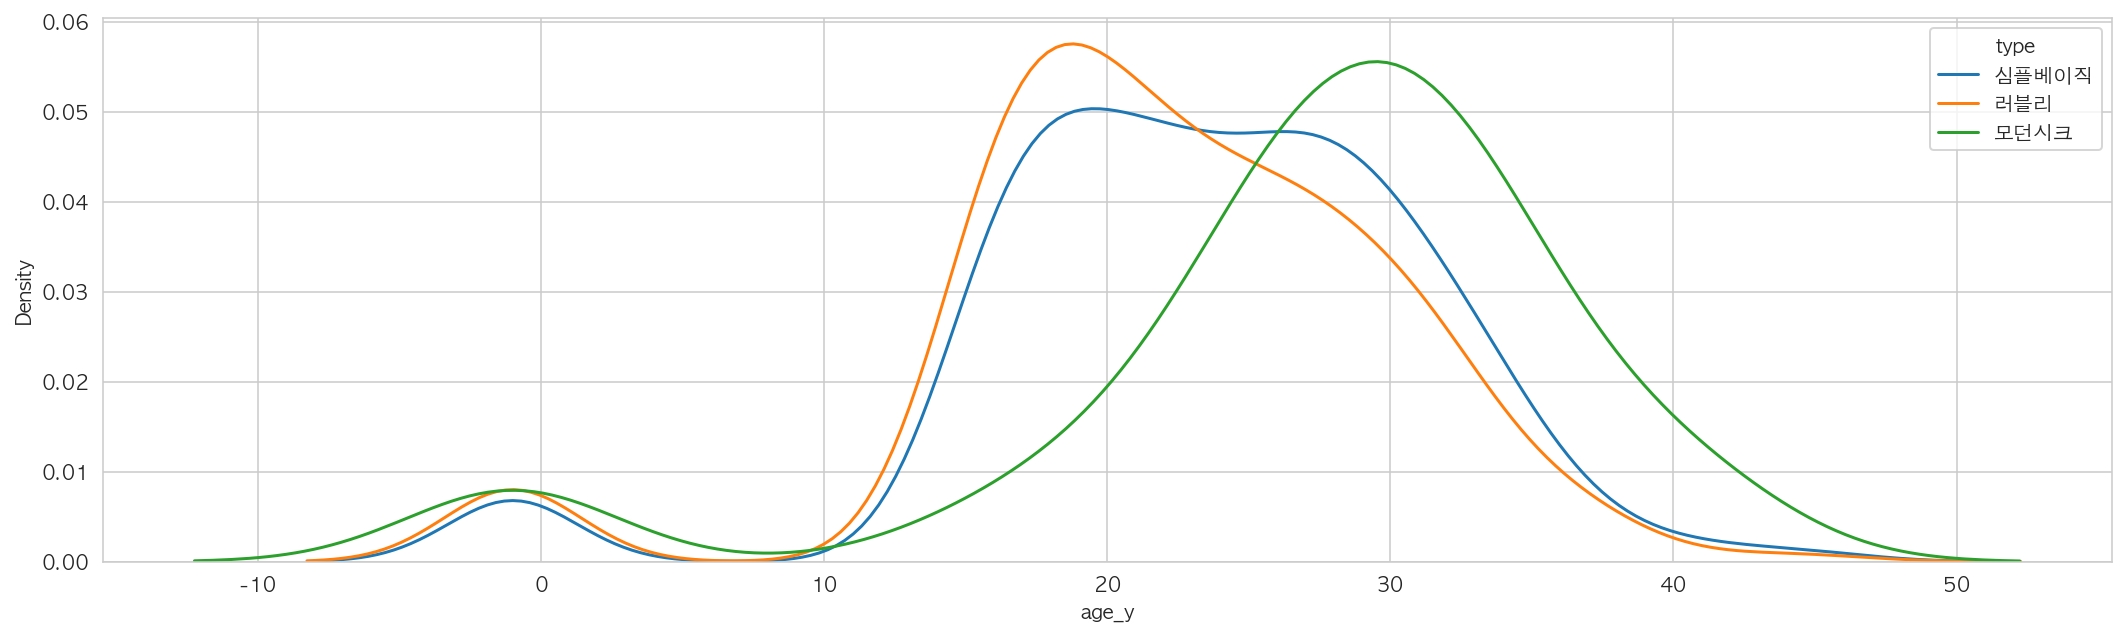

In [78]:
#Write your code here!
import seaborn as sns
import matplotlib.pyplot as plt

one = merged[merged['심플베이직'] == True]
two = merged[merged['러블리'] == True]
three = merged[merged['모던시크'] == True]

plt.figure(figsize=(18, 5))

sns.distplot(one['age_y'],hist=False, label='심플베이직')
sns.distplot(two['age_y'],hist=False, label='러블리')
sns.distplot(three['age_y'],hist=False, label='모던시크')

plt.legend(title='type')